# Keras
Fonte: 
* https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/
* https://machinelearningmastery.com/implement-linear-regression-stochastic-gradient-descent-scratch-python/
* https://machinelearningmastery.com/how-to-control-the-speed-and-stability-of-training-neural-networks-with-gradient-descent-batch-size/
* https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

### mais sobre
* Keras pode ser montado com suporte de Tensorflow, Theano e CNTK
* Keras oferece suporte quanto ao uso de várias GPUs e treinamento distribuído (Horovod)
* Os modelos Keras podem ser transformados em estimadores de TensorFlow e treinados em clusters de GPUs no Google Cloud
* Keras pode ser executado no Spark via Dist-Keras (do CERN) e Elephas

# Passos para criar uma Rede Neural usando Keras
* Preparação dos dados de entrada e saída
* Normalização
* Definição das camadas de Entrada e Saída
    * Definição depende da natureza do problema: regressão, classificação, multilabel, multiclasse, etc
* Definição das camadas escondidas
    * Busca por hiperparâmetros
* Compilação
* Execução
* Avaliação
* Colocar em produção
    * Salvar pesos da Rede Neural treinada
    * Recuperar pesos para realizar inferência
    * Paralelizar processo de inferência

# Estrutura de Dados
* A estrutura de dados principal do Keras é o objeto **model**
* O tipo mais simples de modelo é o **Sequential** (pilha linear de camadas)
* Outros recursos da API Keras permite criar gráfos arbitrários de camadas
```
model = Sequencial()
```
* Empilhando camadas (método add)
```
model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(units=10, activation='softmax'))
```

# Especificando formato da entrada

* O modelo precisa saber que formato de entrada será recebido. Esse formato é definido na primeira camada em um modelo Sequential, as camadas subsequentes definem a entrada e saída de acordo com os parâmetros da Rede Neural.

* Como definir o formato de entrada:
    * Argumento **input_shape** na primeira camada. Essa é uma tupla de forma (uma tupla de números inteiros ou Nenhuma, em que Nenhuma indica que qualquer número inteiro positivo pode ser esperado). Em input_shape, a dimensão do lote não está incluída.
    * Algumas camadas 2D, como Dense, permitem a especificação de sua forma de entrada por meio do argumento **input_dim**, e algumas camadas temporais 3D suportam os argumentos **input_dim** e **input_length**.
```
model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(units=64, activation='relu', input_dim=(100,)))
```

# Compilação

Antes de treinar um modelo, você precisa configurar o processo de aprendizado, que é feito pelo método de compilação. 

Ele recebe três argumentos:
* **optimizer** (Otimizador). Pode ser o identificador de sequência de um otimizador existente (como por exemplos rmsprop ou adagrad) ou uma instância da classe Optimizer.
* **loss** (função de perda). Esse é o objetivo que o modelo tentará minimizar. Pode ser o identificador de cadeia de uma função de perda existente (como categorical_crossentropy ou mse) ou pode ser uma função objetiva. 
* **metrics** (lista de métricas). Para qualquer problema de classificação, você desejará definir isso como métricas=['accuracy']. Uma métrica pode ser o identificador de sequência de uma métrica existente ou uma função de métrica personalizada.

~~~~
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# For a multi-class classification problem
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
              
# For a binary classification problem
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
              
# For a mean squared error regression problem
model.compile(optimizer='rmsprop', loss='mse')

# For a user defined loss function
def user_loss(y_true, y_pred):
    calculated_score = function_of(y_true, y_pred)
    return calculated_score

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', user_loss])
~~~~

# Treinando um modelo

* Os modelos Keras são treinados em matrizes Numpy de dados e rótulos de entrada
* Para treinar um modelo, você normalmente usa a função **fit**

* **x**: Matrix com amostras para treinar o modelo (N dimensões)

* **y**: valor a ser predito (associado com cada amostra x)

* **batch_size**: Número de amostras por atualização de gradiente

* **Épocas**: Número de épocas para treinar o modelo. Uma época é uma iteração sobre todos os dados x e y fornecidos

* **verbose**: monitora execução do modelo. 0 = silencioso, 1 = barra de progresso, 2 = uma linha por época

# Classe Generalista


Available modes: regression, binary, multi, multioutput

Versions:
Keras : 2.2.4-tf
Tensorflow : 2.1.0
GPU enabled!
CPU test for EYE(10000):  0.3153538703918457
GPU test for EYE(10000):  0.37731432914733887

Available genes and variations:
optimizers      ['rmsprop', 'adam']
losses          ['binary_crossentropy']
activators      ['relu', 'elu', 'selu', 'softmax', 'sigmoid']
denses          [0, 1, 2, 4, 8, 16, 32, 64]
dropout         [True, False]
dropout_rate    [0.1, 0.2, 0.3, 0.5]
Mutable:        ['optimizers', 'activators', 'denses', 'dropout', 'dropout_rate']

Neural network and genetics set:
X data shape:             (768, 8)
X data shape:             (768,)
Max topology dept:        ['Dense', 'Dense', 'Dense']
Population size:          10
Number of generations:    3
Proportion on strain:     0.3
DNA length:               15
Genes available to mutate:
 ['optimizers', 'activators', 'denses', 'dropout', 'dropout_rate']

Neural network train starting...

Running generation: 1
Curre

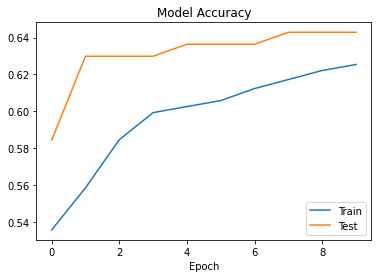

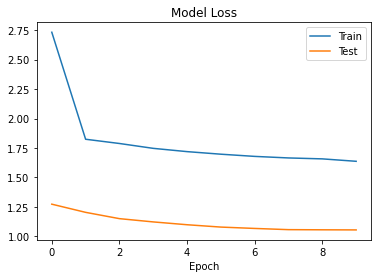

In [1]:
from rubia_ann import *

data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv', header=None)
data = np.array(data)
X, y = data[:,:-1], data[:,-1]

GENES = {
    'optimizers': ['rmsprop','adam'],
    'losses': ['binary_crossentropy'],
    'activators': ['relu','elu','selu','softmax','sigmoid'],
    'denses': [0] + [2 ** i for i in range(0, 7)],
    'dropout': [True, False],
    'dropout_rate': [0.1, 0.2, 0.3, 0.5]
}

# gpu and fixed_genes below are optional parameters 
k = simpler_keras(X=X, y=y, mode='binary', gpu=True, fixed_genes=GENES)
k.check()

topology = ['Dense','Dense','Dense']
k.setGenetic(topology,population=10,generations=3,keep_portion=0.3,input_dim=8,output_dim=1,metrics=['accuracy'])

k.runGenerations(epochs=10, batch_size=100, verbose=0)
del k

## Exemplo Simples de Rede Neural

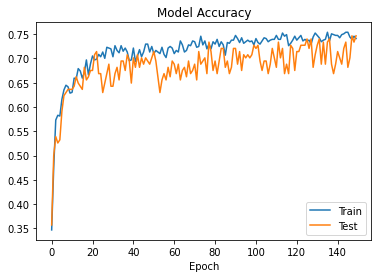

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv', header=None)
data = np.array(data)
X, y = data[:,:-1], data[:,-1] 

model = models.Sequential()
model.add(layers.Dense(12, activation='relu', input_dim=8))
model.add(layers.Dense(8, activation='relu', input_dim=8))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X, y, epochs=150, batch_size=10, validation_split=0.2, verbose=0)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.legend()
plt.show()

## Avaliando desempenho do modelo treinado

* função evaluate que mostra o valor de loss e acurácia após o treino
* As métricas mais elementares são a curva de loss e a curva da métrica usada

768/768 [==============================] - 0s 54us/sample - loss: 0.5143 - accuracy: 0.7630
[0.5143209472298622, 0.7630208]


[Text(0.5, 15.000000000000028, 'Época')]

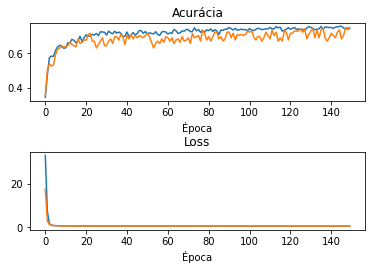

In [12]:
score = model.evaluate(X, y)
print(score)

fig, axs = plt.subplots(2)
fig.tight_layout(pad=3.0)
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('Acurácia')
axs[0].set(xlabel='Época')
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('Loss')
axs[1].set(xlabel='Época')

## Realizando predições com o modelo
* função predict

In [15]:
print(y[:5])
print(model.predict(X[:5]))

[1. 0. 1. 0. 1.]
[[0.6694875 ]
 [0.14517708]
 [0.9058376 ]
 [0.17855592]
 [0.6011322 ]]


## Salvando pesos da rede neural
* Usando pesos de uma rede neural treinada para realizar inferência


In [ ]:
model.save('model.h5')  # creates a HDF5 file 'my_model.h5'

* carregando pesos salvos

In [ ]:
model = load_model('model.h5')

## Exemplo de rede neural para regressão


Available modes: regression, binary, multi, multioutput

Versions:
Keras : 2.2.4-tf
Tensorflow : 2.1.0
GPU enabled!
CPU test for EYE(10000):  0.3000776767730713
GPU test for EYE(10000):  0.01483607292175293

Available genes and variations:
optimizers      ['adam']
losses          ['mse']
activators      ['relu', 'linear']
denses          [4, 8, 16]
dropout         [False]
dropout_rate    [0.0]
Mutable:        ['activators', 'denses']

Neural network and genetics set:
X data shape:             (200, 4)
X data shape:             (200,)
Max topology dept:        ['Dense', 'Dense', 'Dense']
Population size:          10
Number of generations:    5
Proportion on strain:     0.3
DNA length:               15
Genes available to mutate:
 ['activators', 'denses']

Neural network train starting...

Running generation: 1
Current Average Score: 10000000014.07
Total Elapsed Time (s): 12.21
Average Time per Cycle (s): 1.22

Running generation: 2
[10.245394992446398, 13.756817593201502, 9.499092299832

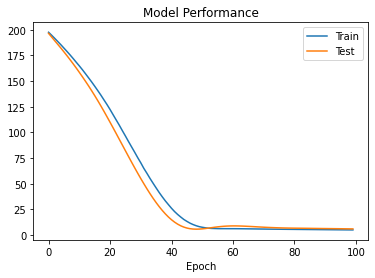

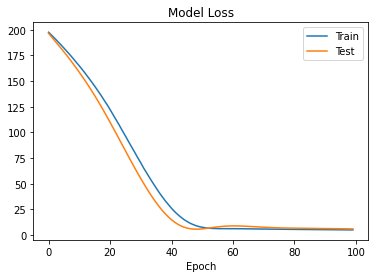

In [12]:
from sklearn.preprocessing import MinMaxScaler

from rubia_ann import *

data = pd.read_csv('https://raw.githubusercontent.com/advinstai/Aprendizagem-estatistica-regressao/master/exercicios/Advertising.csv')
data = np.array(data)
X, y = data[:,:-1], data[:,-1]

scalarX, scalarY = MinMaxScaler(), MinMaxScaler()
scalarX.fit(X)
X = scalarX.transform(X)

GENES = {
    'optimizers': ['adam'],
    'losses': ['mse'],
    'activators': ['relu','linear'],
    'denses': [2 ** i for i in range(2, 5)],
    'dropout': [False],
    'dropout_rate': [0.0]
}

# gpu and fixed_genes below are optional parameters 
k = simpler_keras(X=X, y=y, mode='regression', gpu=True, fixed_genes=GENES)
k.check()

topology = ['Dense','Dense','Dense']
k.setGenetic(topology,population=10,generations=5,keep_portion=0.3,input_dim=4,output_dim=1,metrics=['mse'])

k.runGenerations(epochs=100, batch_size=100, verbose=0)

In [13]:
print(k.y[:5])
print(k.best_model.predict(k.X[:5]))

tf.Tensor([22.1 10.4  9.3 18.5 12.9], shape=(5,), dtype=float64)
[[19.59257 ]
 [11.936139]
 [12.65138 ]
 [16.68845 ]
 [14.284048]]


In [20]:
scalarX, scalarY = MinMaxScaler(), MinMaxScaler()
scalarX.fit(X)

X = scalarX.transform(X)

# define and fit the final model
model = models.Sequential()
model.add(layers.Dense(16, input_dim=4, activation='linear'))
model.add(layers.Dense(16, activation='linear'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='relu'))
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

history = model.fit(X, y, epochs=100, verbose=0, validation_split=0.2)

200/200 [==============================] - 0s 41us/sample - loss: 3.3865 - mse: 3.3865
[3.3865029048919677, 3.3865027]


[Text(0.5, 15.000000000000028, 'Época')]

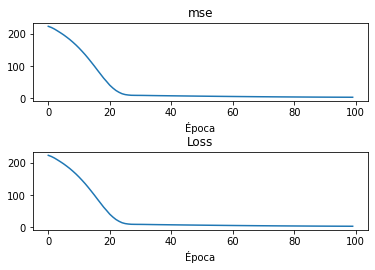

In [21]:
score = model.evaluate(X, y)
print(score)

fig, axs = plt.subplots(2)

fig.tight_layout(pad=3.0)

x=history.history['mse']
axs[0].plot(x)
axs[0].set_title('mse')
axs[0].set(xlabel='Época')

x=history.history['loss']
axs[1].plot(x)
axs[1].set_title('Loss')
axs[1].set(xlabel='Época')

In [ ]:
import tensorflow.keras as keras
import tensorflow as tf

import numpy as np
import pandas as pd
from matplotlib import pyplot

from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler

## Teste de Rede Neural com N-classes

In [23]:
# For a single-input model with 10 classes (categorical classification):

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_dim=1000))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Generate dummy data
import numpy as np
data = np.random.random((10000, 1000))
labels = np.random.randint(10, size=(10000, 1))

# Convertendo labels em categorias one-hot encoding
one_hot_labels = keras.utils.to_categorical(labels, num_classes=10)

history = model.fit(data, one_hot_labels, epochs=10, batch_size=32)

Train on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 1s 73us/sample - loss: 2.3101 - accuracy: 0.1037
Epoch 2/10
10000/10000 [==============================] - 1s 54us/sample - loss: 2.3029 - accuracy: 0.1042
Epoch 3/10
10000/10000 [==============================] - 1s 55us/sample - loss: 2.3027 - accuracy: 0.1050
Epoch 4/10
10000/10000 [==============================] - 1s 53us/sample - loss: 2.3029 - accuracy: 0.1055
Epoch 5/10
10000/10000 [==============================] - 1s 59us/sample - loss: 2.3024 - accuracy: 0.1051
Epoch 6/10
10000/10000 [==============================] - 1s 51us/sample - loss: 2.3024 - accuracy: 0.1051
Epoch 7/10
10000/10000 [==============================] - 1s 51us/sample - loss: 2.3024 - accuracy: 0.1049
Epoch 8/10
10000/10000 [==============================] - 1s 52us/sample - loss: 2.3024 - accuracy: 0.1051
Epoch 9/10
10000/10000 [==============================] - 1s 57us/sample - loss: 2.3024 - accuracy: 0.1044
Epoch 10/10
10

## Escolhendo parâmetros da Rede Neural
* Uma técnica para lidar com a complexidade de parâmetros é o processo de busca por hiperparâmetros automatizado (Usando scikit-learn por exemplo)

In [103]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Readying neural network model
def build_nn(activation = 'relu', optimizer = 'Adam'):   
    model = models.Sequential()
    model.add(layers.Dense(12, input_dim=8, activation='relu'))
    model.add(layers.Dense(128, activation=activation))
    model.add(layers.Dense(1, activation='sigmoid'))    
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

param_grid = {
              'epochs':        [15, 20],
              'batch_size':    [128, 256],
              #'activation':   ['softmax','relu']
              #'optimizer':    ['RMSprop','Adam']
              'optimizer' :    ['sgd', 'Adam', 'Nadam'],
              #'dropout_rate': [0.2, 0.3],
              'activation' :   ['relu', 'elu', 'softmax']
             }

seed = 7
np.random.seed(seed)

data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv', header=None)
data = np.array(data)
X, y = data[:,:-1], data[:,-1]

model = KerasClassifier(build_fn=build_nn, verbose=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=0, 
                    scoring='accuracy', return_train_score=True)
grid_result = grid.fit(X, y)

In [120]:
print(grid_result)
print(grid_result.best_score_)
print(grid_result.best_params_)
print(grid_result.best_estimator_)
print(sorted(grid_result.cv_results_))

GridSearchCV(cv=3, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fab021ca510>,
             iid='deprecated', n_jobs=4,
             param_grid=[{'act1': ['relu'], 'act2': ['softmax'],
                          'batch_size': [32], 'd1': [2],
                          'optimizer': ['adam']},
                         {'act1': ['elu'], 'act2': ['sigmoid'],
                          'batch_size': [64], 'd1': [8],
                          'optimizer': ['adam']},
                         {'act1': ['relu'], 'act2': ['softmax'],
                          'batch_size': [128], 'd1': [4],
                          'optimizer': ['adam']},
                         {'act1': ['elu'], 'act2': ['sigmoid'],
                          'batch_size': [64], 'd1': [16],
                          'optimizer': ['adam']},
                         {'act1': ['relu'], 'act2': ['softmax'],
                          'batch_size': [64], 'd1': [4],


## Otimizador: teste para implantar no rubia_ann
* A GridSearchCV está preparada para explorar os recurso de thread e GPU
* Etapas:
    * criar a função que constrói a NN, ela recebe as keys dos params como parâmetros
    * criar model = KerasClassifier(build_fn=my_nn_builder_function, verbose=1)
    * criar o grid = GridSearchCV(estimator=model, params=my_param_dict, n_jobs=-1, cv=3)
    * calcular result = grid.fit(X, y)
    
No nosso caso, alteramos o wrapper KerasClassifier pelo novo myKerasWrapper. A classe pai do KerasClassifier foi incorporada também nesta mesma classe.

In [2]:
class myKerasWrapper():

    def __init__(self, build_fn=None, **sk_params):
        self.build_fn = build_fn
        self.sk_params = sk_params
    
    def get_params(self, **params):  # pylint: disable=unused-argument
        res = copy.deepcopy(self.sk_params)
        res.update({'build_fn': self.build_fn})
        return res

    def set_params(self, **params):
        self.sk_params.update(params)
        return self

    def fit(self, x, y, **kwargs):
        y = np.array(y)
        if len(y.shape) == 2 and y.shape[1] > 1:
            self.classes_ = np.arange(y.shape[1])
        elif (len(y.shape) == 2 and y.shape[1] == 1) or len(y.shape) == 1:
            self.classes_ = np.unique(y)
            y = np.searchsorted(self.classes_, y)
        else:
            raise ValueError('Invalid shape for y: ' + str(y.shape))
        self.n_classes_ = len(self.classes_)
        self.model = self.build_fn(**self.sk_params)
        if (losses.is_categorical_crossentropy(self.model.loss) and len(y.shape) != 2):
            y = to_categorical(y)
        fit_args = copy.deepcopy(self.filter_sk_params(Sequential.fit))
        fit_args.update(kwargs)
        print(fit_args)
        self.model.summary()
        history = self.model.fit(x, y, **fit_args)
        return history

    def filter_sk_params(self, fn, override=None):
        override = override or {}
        res = {}
        for name, value in self.sk_params.items():
            if has_arg(fn, name):
                res.update({name: value})
        res.update(override)
        return res

    def predict(self, x, **kwargs):
        kwargs = self.filter_sk_params(Sequential.predict_classes, kwargs)
        classes = self.model.predict_classes(x, **kwargs)
        return self.classes_[classes]

    def predict_proba(self, x, **kwargs):
        kwargs = self.filter_sk_params(Sequential.predict_proba, kwargs)
        probs = self.model.predict_proba(x, **kwargs)
        # check if binary classification
        if probs.shape[1] == 1:
            probs = np.hstack([1 - probs, probs])
        return probs

    def score(self, x, y, **kwargs):
        y = np.searchsorted(self.classes_, y)
        kwargs = self.filter_sk_params(Sequential.evaluate, kwargs)
        loss_name = self.model.loss
        if hasattr(loss_name, '__name__'):
            loss_name = loss_name.__name__
        if loss_name == 'categorical_crossentropy' and len(y.shape) != 2:
            y = to_categorical(y)

        outputs = self.model.evaluate(x, y, **kwargs)
        if not isinstance(outputs, list):
            outputs = [outputs]
        for name, output in zip(self.model.metrics_names, outputs):
            if name in ['accuracy', 'acc']:
                return output
        raise ValueError('The model is not configured to compute accuracy. '
                     'You should pass `metrics=["accuracy"]` to '
                     'the `model.compile()` method.')
        
import types
import copy
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import tensorflow.keras.wrappers.scikit_learn
from tensorflow.python.keras import losses
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.utils.generic_utils import has_arg



from sklearn.model_selection import GridSearchCV

def build_nn(**kwargs):   
    #print('\nEntrei na build_nn. Aqui vai a função que cria e retorna um model')
    #print(kwargs)
    model = models.Sequential()
    model.add(layers.Dense(kwargs['d1'], input_dim=8, activation=kwargs['act1']))
    model.add(layers.Dense(kwargs['d2'], activation=kwargs['act2']))
    model.add(layers.Dense(1, activation=kwargs['act3']))    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    #model.summary()
    return model


param_grid = [
             {'d1':  [4], 'd2':  [1], 'act1': ['elu'],  'act2': ['sigmoid'], 'act3': ['softmax'],'batch_size': [64],  'optimizer': ['adam'], 'epochs': [40]},
             {'d1': [12], 'd2':  [8], 'act1': ['relu'], 'act2': ['relu'], 'act3': ['sigmoid'],'batch_size': [10],  'optimizer': ['adam'], 'epochs': [60]}
             ]

mode = 'binary'
if mode == 'binary':
    data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv', header=None)
    data = np.array(data)
    X, y = data[:,:-1], data[:,-1]
    metric = 'accuracy'
if mode == 'regression':
    data = pd.read_csv('https://raw.githubusercontent.com/advinstai/Aprendizagem-estatistica-regressao/master/exercicios/Advertising.csv')
    data = np.array(data)
    X, y = data[:,:-1], data[:,-1]
    scalarX, scalarY = MinMaxScaler(), MinMaxScaler()
    scalarX.fit(X)
    X = scalarX.transform(X)
    metric = 'mse'
    

model = myKerasWrapper(build_fn=build_nn, **{'verbose': 0, 'mode': 'bynary', 
                                             'metrics': metric, 'validation_split': 0.2})
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=2, verbose=0, 
                    scoring=metric, return_train_score=True)
grid_result = grid.fit(X, y)

print(grid_result)
print(grid_result.best_score_)
print(grid_result.best_params_)
print(grid_result.cv_results_['mean_test_score'])
print(grid_result.cv_results_['params'])

{'verbose': 0, 'validation_split': 0.2, 'batch_size': 64, 'epochs': 40}
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 36        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________
{'verbose': 0, 'validation_split': 0.2, 'batch_size': 64, 'epochs': 40}
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 36        
__________________________

## Exemplos de Rede Neural
* Primeiro exemplo

In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

# Generate dummy data
import numpy as np
x_train = np.random.random((1000, 20))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
x_test = np.random.random((100, 20))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)

model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(64, activation='relu', input_dim=20))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)

Using TensorFlow backend.


Epoch 1/20
1000/1000 [==============================] - 0s 220us/step - loss: 2.4650 - accuracy: 0.0980
Epoch 2/20
1000/1000 [==============================] - 0s 20us/step - loss: 2.3657 - accuracy: 0.1170
Epoch 3/20
1000/1000 [==============================] - 0s 23us/step - loss: 2.3372 - accuracy: 0.1140
Epoch 4/20
1000/1000 [==============================] - 0s 17us/step - loss: 2.3279 - accuracy: 0.1100
Epoch 5/20
1000/1000 [==============================] - 0s 18us/step - loss: 2.3153 - accuracy: 0.1090
Epoch 6/20
1000/1000 [==============================] - 0s 16us/step - loss: 2.3153 - accuracy: 0.1260
Epoch 7/20
1000/1000 [==============================] - 0s 17us/step - loss: 2.3061 - accuracy: 0.1340
Epoch 8/20
1000/1000 [==============================] - 0s 21us/step - loss: 2.3038 - accuracy: 0.1110
Epoch 9/20
1000/1000 [==============================] - 0s 17us/step - loss: 2.2979 - accuracy: 0.1240
Epoch 10/20
1000/1000 [==============================] - 0s 18us/step - 

* Segundo exemplo

In [34]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Generate dummy data
x_train = np.random.random((1000, 20))
y_train = np.random.randint(2, size=(1000, 1))
x_test = np.random.random((100, 20))
y_test = np.random.randint(2, size=(100, 1))

model = Sequential()
model.add(Dense(64, input_dim=20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)

Epoch 1/20
1000/1000 [==============================] - 0s 159us/step - loss: 0.7356 - accuracy: 0.5050
Epoch 2/20
1000/1000 [==============================] - 0s 20us/step - loss: 0.7034 - accuracy: 0.5320
Epoch 3/20
1000/1000 [==============================] - 0s 19us/step - loss: 0.6974 - accuracy: 0.5250
Epoch 4/20
1000/1000 [==============================] - 0s 19us/step - loss: 0.6854 - accuracy: 0.5450
Epoch 5/20
1000/1000 [==============================] - 0s 18us/step - loss: 0.7010 - accuracy: 0.5050
Epoch 6/20
1000/1000 [==============================] - 0s 18us/step - loss: 0.6986 - accuracy: 0.5130
Epoch 7/20
1000/1000 [==============================] - 0s 17us/step - loss: 0.6967 - accuracy: 0.5330
Epoch 8/20
1000/1000 [==============================] - 0s 17us/step - loss: 0.6897 - accuracy: 0.5220
Epoch 9/20
1000/1000 [==============================] - 0s 18us/step - loss: 0.6993 - accuracy: 0.5070
Epoch 10/20
1000/1000 [==============================] - 0s 15us/step - 

## Obtendo valor de uma camada intermediaria

In [53]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Generate dummy data
x_train = np.random.random((1000, 20))
y_train = np.random.randint(2, size=(1000, 1))
x_test = np.random.random((100, 20))
y_test = np.random.randint(2, size=(100, 1))

model = Sequential()
model.add(Dense(64, input_dim=20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

## Recurso de parada antecipada
* Parar o treino quando já tiver alcançado um determinado limiar de acurácia

In [55]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(x_train, y_train, epochs=500, batch_size=128, validation_split=0.20, callbacks=[early_stopping])
score = model.evaluate(x_test, y_test, batch_size=128)
print(score)

Train on 800 samples, validate on 200 samples
Epoch 1/500
800/800 [==============================] - 0s 29us/step - loss: 0.6996 - accuracy: 0.5075 - val_loss: 0.6936 - val_accuracy: 0.4800
Epoch 2/500
800/800 [==============================] - 0s 28us/step - loss: 0.6997 - accuracy: 0.5238 - val_loss: 0.6935 - val_accuracy: 0.4650
Epoch 3/500
800/800 [==============================] - 0s 23us/step - loss: 0.7048 - accuracy: 0.4850 - val_loss: 0.6927 - val_accuracy: 0.5050
Epoch 4/500
800/800 [==============================] - 0s 31us/step - loss: 0.6982 - accuracy: 0.4925 - val_loss: 0.6925 - val_accuracy: 0.5200
Epoch 5/500
800/800 [==============================] - 0s 20us/step - loss: 0.6924 - accuracy: 0.5400 - val_loss: 0.6915 - val_accuracy: 0.5200
Epoch 6/500
800/800 [==============================] - 0s 23us/step - loss: 0.6955 - accuracy: 0.5025 - val_loss: 0.6922 - val_accuracy: 0.4950
Epoch 7/500
800/800 [==============================] - 0s 28us/step - loss: 0.6947 - accur

In [43]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)
score = model.evaluate(x_test, y_test, batch_size=128)

Train on 800 samples, validate on 200 samples
Epoch 1/20
800/800 [==============================] - 0s 34us/step - loss: 0.3884 - accuracy: 0.8213 - val_loss: 0.2129 - val_accuracy: 0.9550
Epoch 2/20
800/800 [==============================] - 0s 26us/step - loss: 0.3458 - accuracy: 0.8250 - val_loss: 0.2096 - val_accuracy: 0.9500
Epoch 3/20
800/800 [==============================] - 0s 27us/step - loss: 0.3576 - accuracy: 0.8487 - val_loss: 0.2185 - val_accuracy: 0.9350
Epoch 4/20
800/800 [==============================] - 0s 25us/step - loss: 0.3438 - accuracy: 0.8450 - val_loss: 0.2187 - val_accuracy: 0.9450
Epoch 5/20
800/800 [==============================] - 0s 26us/step - loss: 0.3421 - accuracy: 0.8300 - val_loss: 0.2186 - val_accuracy: 0.9400
Epoch 6/20
800/800 [==============================] - 0s 25us/step - loss: 0.3552 - accuracy: 0.8275 - val_loss: 0.2205 - val_accuracy: 0.9450
Epoch 7/20
800/800 [==============================] - 0s 26us/step - loss: 0.3380 - accuracy: 0.

## O que significa "amostra", "lote", "época"?


* Amostra: um elemento de um conjunto de dados.
    * uma imagem é uma amostra em uma rede convolucional
    * um arquivo de áudio é uma amostra para um modelo de reconhecimento de fala

* Lote: um conjunto de N amostras. As amostras em um lote são processadas independentemente, em paralelo. Se estiver treinando, um lote resultará em apenas uma atualização para o modelo.
Um lote geralmente aproxima a distribuição dos dados de entrada melhor do que uma única entrada. Quanto maior o lote, melhor a aproximação; no entanto, também é verdade que o lote levará mais tempo para processar e ainda resultará em apenas uma atualização. Para inferência (avaliação / previsão), é recomendável escolher um tamanho de lote tão grande quanto você puder pagar sem ficar sem memória (pois lotes maiores geralmente resultam em uma avaliação / previsão mais rápida).

* Época: um ponto de corte arbitrário, geralmente definido como "uma passagem por todo o conjunto de dados", usado para separar o treinamento em fases distintas, o que é útil para registro e avaliação periódica.
Ao usar validation_data ou validation_split com o método de ajuste dos modelos Keras, a avaliação será executada no final de cada época.
No Keras, há a capacidade de adicionar retornos de chamada projetados especificamente para serem executados no final de uma época. Exemplos disso são mudanças na taxa de aprendizado e verificação de modelo (salvamento).

## Escolhendo algoritmos de otimização de modelo

* Os algoritmos de otimização que usam todo o conjunto de treinamento são chamados métodos em lote ou gradiente determinístico, porque processam todos os exemplos de treinamento simultaneamente em um lote grande.

* Algoritmos de otimização que usam apenas um único exemplo de cada vez são chamados de métodos estocásticos ou, às vezes, online. O termo online geralmente é reservado para o caso em que os exemplos são extraídos de um fluxo de exemplos criados continuamente, e não de um conjunto de treinamento de tamanho fixo sobre o qual são feitas várias passagens.

* Batch Gradient Descent. O tamanho do batch é definido como o número total de exemplos no conjunto de dados de treinamento.
* Stochastic Gradient Descent. O tamanho do batch é igual a 1
* Minibatch Gradient Descent. O tamanho do batch é definido como mais de um e menor que o número total de exemplos no conjunto de dados de treinamento.

# Abaixo o treino é feito usando Batch Gradient Descent. 


In [59]:
# mlp for the blobs problem with batch gradient descent
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
y = to_categorical(y)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=len(trainX))
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.816, Test: 0.832


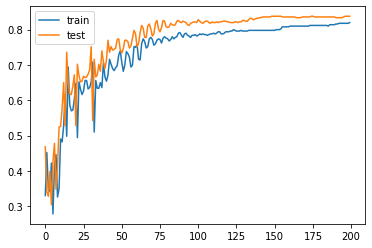

In [58]:
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

* A execução do exemplo primeiro relata o desempenho do modelo nos conjuntos de dados de treino e teste.
* Seus resultados específicos podem variar de acordo com a natureza estocástica do algoritmo de aprendizado; considere executar o exemplo algumas vezes.
* Nesse caso, podemos ver que o desempenho foi semelhante entre os conjuntos de treinos e testes com 81% e 83%, respectivamente.
* O resultado do treino mostra que o acurácia estabilizou a partir da época 100

# Rodando com batch igual a 1

In [60]:
# mlp for the blobs problem with batch gradient descent
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot

history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=1)
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.434, Test: 0.442


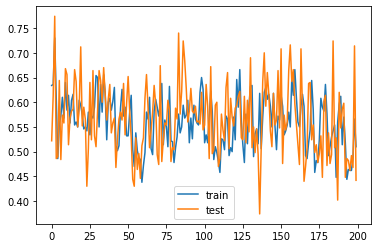

In [61]:
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# A instabilidade sugere que o learning rate pode não estar adequado

Train: 0.832, Test: 0.820


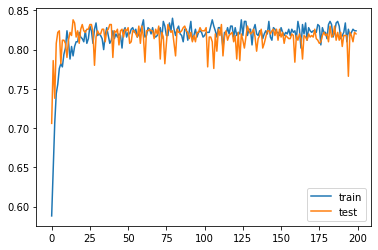

In [62]:
# mlp for the blobs problem with stochastic gradient descent
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot

model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=1)
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# Treinando modelo usando mini-batch

Train: 0.822, Test: 0.822


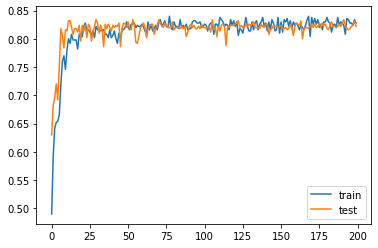

In [63]:
# mlp for the blobs problem with minibatch gradient descent
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot

# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=32)
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()